**IMPORT PACKAGE JCOPML**

In [1]:
!pip install jcopml

     |████████████████████████████████| 102kB 4.2MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.10-py2.py3-none-any.whl size=33230 sha256=6a6d8e338f9ac17f86cac4e95ab104239fa5e32e7c6d54a93418412d641c173e
  Stored in directory: /root/.cache/pip/wheels/82/22/ce/b8b4c3400f788e5050b5b4b4d988884b8ec72b6b8751693914
Successfully built jcopml


**IMPORT COMMON PACKAGE**

In [40]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
pd.options.display.max_columns =300

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

**IMPORT TRAIN BRI.CSV**

In [15]:
df = pd.read_csv("train bri.csv")
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.75,PG03,1.75,5.92,RM_type_A,Permanent,Male,1984,Y,0,0,0,NaN,NaN,NaN,6.0,6,1,4,4,10,0,0,86.00,81.32,2.0,achiev_50%-100%,achiev_< 50%,reached


**SHAPE DATASET**

In [4]:
df.shape

(6162, 30)

**VALUE COUNTS achievement_target_1 FEATURE**

In [17]:
df.achievement_target_1.value_counts()

achiev_50%-100%           2483
achiev_100%-150%           812
achiev_< 50%               707
Pencapaian 50%-100%        205
achiev_> 1.5               177
Pencapaian 100%-150%        64
Tidak diberikan target      57
Pencapaian < 50%            25
Pencapaian > 1.5             3
Name: achievement_target_1, dtype: int64

**VALUE COUNTS achievement_target_2 FEATURE**

In [18]:
df.achievement_target_2.value_counts()

achiev_< 50%              2878
achiev_50%-100%            725
achiev_> 1.5               316
achiev_100%-150%           270
Pencapaian < 50%           215
Pencapaian 50%-100%         55
Tidak diberikan target      45
Pencapaian 100%-150%        19
Pencapaian > 1.5            10
Name: achievement_target_2, dtype: int64

**PLOT MISSING VALUE DATA**

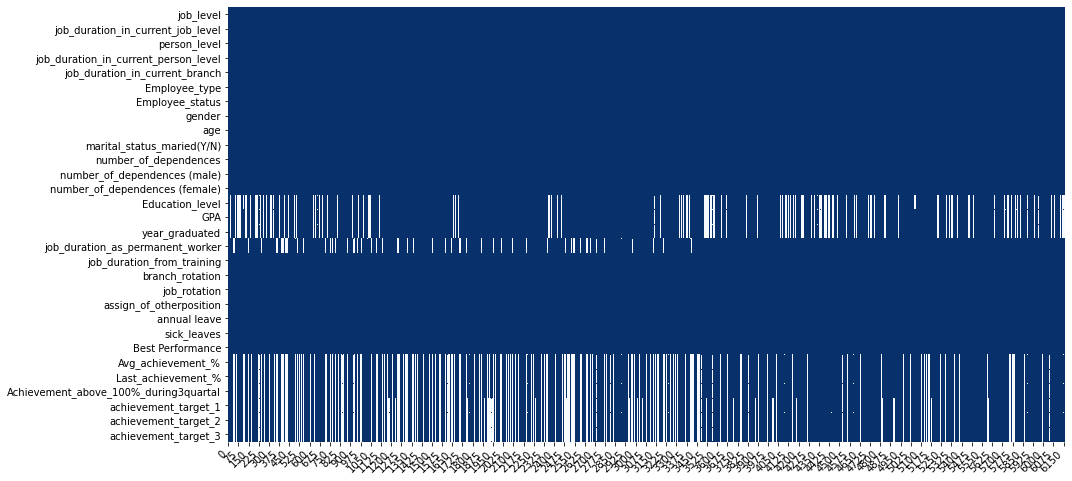

In [14]:
plot_missing_value(df)

**DROPNA MISSING VALUE**

In [22]:
df.dropna(inplace =True)

**PLOT MISSING VALUE AGAIN**

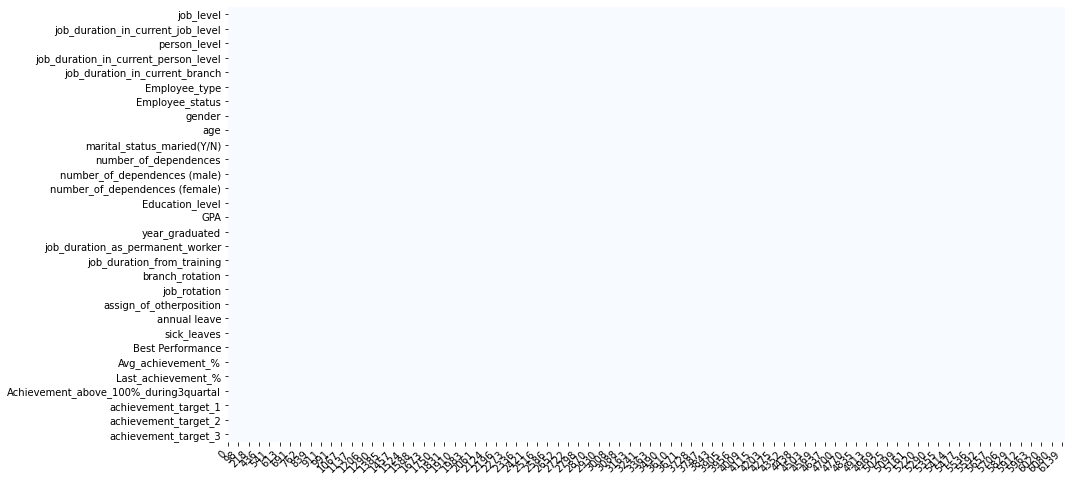

In [23]:
plot_missing_value(df)

**VALUE COUNTS FEATURE TARGET(BEST PERFORMANCE)**

In [24]:
df['Best Performance'].value_counts()

0    1850
1    1728
Name: Best Performance, dtype: int64

In [25]:
df['Employee_status'].dropna(inplace=True)

In [26]:
df['Employee_status'].value_counts()

Permanent    3578
Name: Employee_status, dtype: int64

**EXPLORATORY DATA ANALYSIST**

In [27]:
df[['achievement_target_1','job_duration_from_training']].value_counts()

achievement_target_1  job_duration_from_training
achiev_50%-100%       6                             451
                      3                             370
                      4                             364
                      5                             348
achiev_< 50%          3                             241
                                                   ... 
Pencapaian < 50%      22                              1
                      19                              1
                      15                              1
Pencapaian 50%-100%   25                              1
Pencapaian 100%-150%  2                               1
Length: 139, dtype: int64

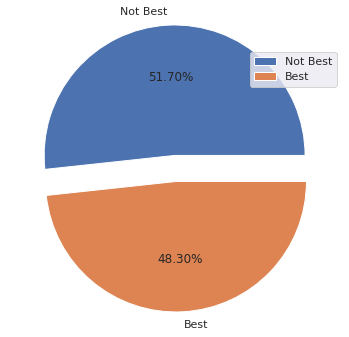

In [41]:
best_performance_df = df['Best Performance'].value_counts()
best_performance_df.index = ['Not Best', 'Best']

plt.axis("equal")
plt.pie(
    best_performance_df.values,
    labels=best_performance_df.index,
    autopct='%.2f%%',
    explode=[0, 0.3],
    radius=1.5,
)

plt.legend()
plt.show()

In [43]:
def analyze_wrt_bestperformance(column_name):
    performance_df = df.groupby(column_name)['Best Performance'].mean().multiply(100).sort_values(ascending=False)

    for index in performance_df.index:
        print(f"{column_name} {index} best performance percentage is {round(performance_df[index], 2)}%")

def visualize_wrt_bestperformance(column_name, width=12):
    plt.figure(figsize=(width, 8))
    joblevel_viz = sns.countplot(df[column_name], hue=df['Best Performance'])
    joblevel_viz.set_title(f"{column_name} Best Performance Count")

    for axes in joblevel_viz.patches:
        value = axes.get_height()
        text = f"{value} ({round(value / df.job_level.shape[0] * 100, 2)}%)"
        x = axes.get_x() + axes.get_width() / 2
        joblevel_viz.annotate(text, (x, value), ha='center', va='center', fontsize=8, xytext=(0, 5), textcoords='offset points')

    plt.legend(["Not Best", "Best"])
    return plt.show()

job_level JG03 best performance percentage is 54.55%
job_level JG05 best performance percentage is 51.93%
job_level JG04 best performance percentage is 48.02%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


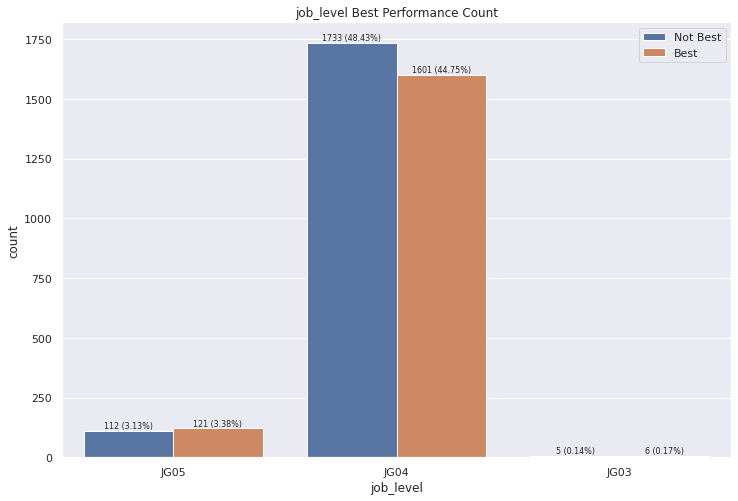

In [44]:
analyze_wrt_bestperformance('job_level')
visualize_wrt_bestperformance('job_level')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


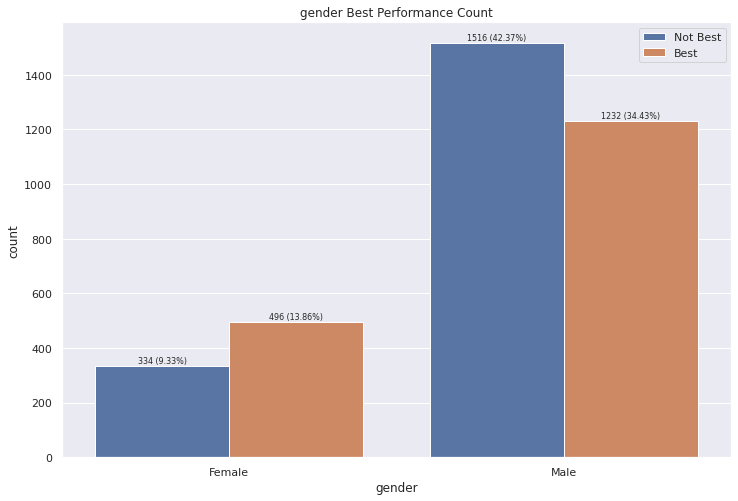

In [45]:
visualize_wrt_bestperformance('gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


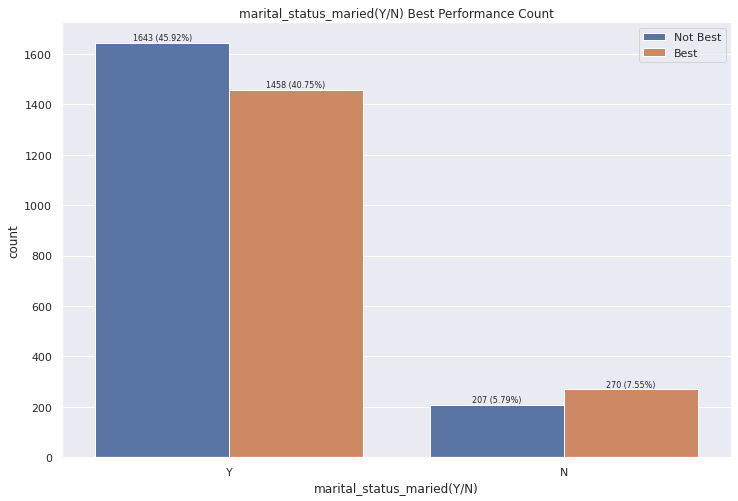

In [46]:
visualize_wrt_bestperformance('marital_status_maried(Y/N)')

**SPLIT TRAIN AND TEST SPLIT**

In [29]:
X = df.drop(columns="Best Performance")
y = df['Best Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2862, 29), (716, 29), (2862,), (716,))

In [30]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
5,JG04,2.42,PG03,2.42,1.50,RM_type_A,Permanent,Male,1987,Y,1,1,0,level_3,2.84,2008,6.0,6,3,2,1,8,5,0,110.43,101.79,3.0,achiev_50%-100%,achiev_100%-150%,not_reached


**SPLIT NUMERIC AND CATEGORIC FEATURE**

In [31]:
preprocessor = ColumnTransformer([
   ('numeric', num_pipe(poly=2, transform='yeo-johnson'), ['job_duration_in_current_job_level' , 'job_duration_in_current_person_level' ,'job_duration_in_current_branch',
                            'age' , 'number_of_dependences' , 'number_of_dependences (male)' , 'number_of_dependences (female)','Avg_achievement_%' , 'Last_achievement_%', 'Achievement_above_100%_during3quartal',
        'job_rotation' , 'assign_of_otherposition' , 'annual leave' , 'job_duration_from_training', 
                             'branch_rotation',
                              'sick_leaves', 'job_duration_as_permanent_worker','GPA'
                            ]),

    ('categoric', cat_pipe(encoder='onehot'), ['job_level','person_level', 'Employee_type',  'Employee_status','gender','achievement_target_1', 'achievement_target_2', 'achievement_target_3',
        'marital_status_maried(Y/N)','Education_level', 
         'year_graduated'
         ]),
])

**FIT MODEL USING SUPPORT VECTOR CLASSIFIER**

In [32]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=600))
])

**HYPERPARAMTER TUNING USING RANDOMIZED SEARCH CV**

In [33]:
from jcopml.tuning.space import Real , Integer
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [34]:
model = RandomizedSearchCV(pipeline, rsp.svm_poly_params, cv=3, n_iter=3, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxSc

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('prep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                         

**PRINT BEST MODEL HYPERPARAMETER TUNING AND PRINT BEST SCORE TRAIN AND TEST**

In [35]:
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

{'algo__C': 3.907967156822884, 'algo__gamma': 0.008632008168602547, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
0.7459818308874913 0.5251572327044025 0.5083798882681564


**PLOT ASSOCIATION MATRIX**

In [36]:
from jcopml.plot import plot_association_matrix

In [38]:
plot_association_matrix(df , 'Best Performance' , categoric_col =  ['job_level','person_level', 'Employee_type','gender','achievement_target_1', 'achievement_target_2', 'achievement_target_3',
        'marital_status_maried(Y/N)','Education_level', 
         'year_graduated'
         ])

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

In [ ]:
test = pd.read_csv("test.csv")
test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,1.42,PG05,1.42,0.5,RM_type_C,Permanent,Female,1983,Y,2,1,1,level_3,3.75,2004,13.0,14,7,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,1.58,PG03,1.58,2.0,RM_type_A,Permanent,Male,1988,N,0,0,0,level_4,3.07,2011,4.0,4,2,2,2,4,1,54.283333,42.97,0.0,Pencapaian < 50%,Pencapaian < 50%,reached
2,JG04,1.83,PG03,1.83,1.5,RM_type_A,Permanent,Male,1988,Y,1,0,1,level_4,3.23,2011,4.0,4,3,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached
3,JG05,8.00,PG06,5.00,1.5,RM_type_A,Permanent,Male,1973,Y,3,2,1,level_4,0.00,\N,22.0,22,8,5,11,3,0,74.390000,80.93,0.0,Pencapaian 50%-100%,Pencapaian < 50%,not reached
4,JG04,1.92,PG03,1.92,0.5,RM_type_A,Permanent,Female,1985,Y,1,1,0,level_3,3.86,2008,6.0,6,6,3,0,3,0,106.376667,109.09,3.0,Pencapaian 50%-100%,Pencapaian > 1.5,reached


In [ ]:
Y_pred = model.predict(test)

In [ ]:
submission = pd.DataFrame({
        
        "Best Performance": Y_pred
    })


In [ ]:
submission.to_csv('submit-bri-clf.csv',index="Best Performance")

In [ ]:
test= pd.read_csv('submit-bri-clf.csv')
test.head()

,Unnamed: 0,Best Performance
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
test.rename(columns = {'Unnamed: 0':'index'}, inplace = True)

In [ ]:
test.set_index('index', inplace=True)

In [ ]:
test.to_csv('submit-bri-clf.csv',index="index")